# Results visualization

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import joblib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
networks = ["yeast", "gs0.01", "gs0.1", "gs1"]
distribution = dict.fromkeys(networks)
for network in networks:
    motifs = sorted(os.listdir(f"./motif_search_results/{network}"))
    distribution[network] = dict.fromkeys(motifs)
    for motif in motifs:
        number = len(joblib.load(f"./motif_search_results/{network}/{motif}/genes.pkl"))
        distribution[network][motif] = number

In [3]:
def plot_distr(network, title, figsize=(15, 6)):
    distr = distribution[network]
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=20)
    plt.bar(distr.keys(), distr.values());

# Yeast Tnet

cascade           37631
cascade_sl        37631
fanin             26042
fanin_sl          26042
feedforward        3374
feedforward_sl     3555
dtype: int64


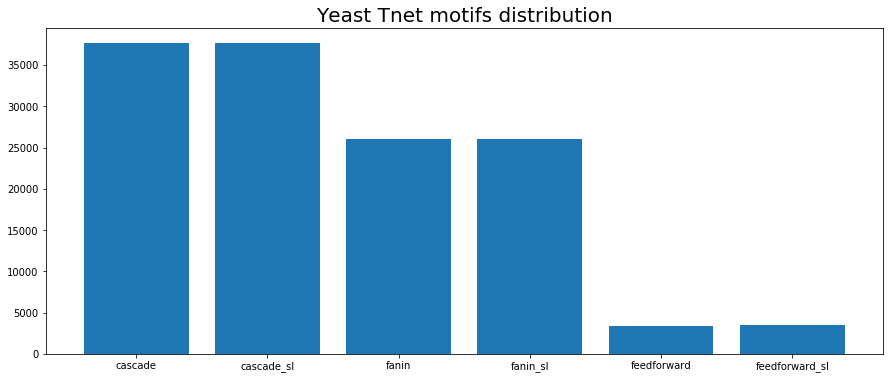

In [4]:
print(pd.Series(distribution["yeast"]))
plot_distr("yeast", "Yeast Tnet motifs distribution")

# Gene Spyder, different SNR

In [5]:
gs_results = pd.DataFrame(index=range(12), columns=["network", "motif", "number"])
i = 0
for net in ["gs0.01", "gs0.1", "gs1"]:
    for motif, number in distribution[net].items():
        gs_results.iloc[i, :] = [net, motif, number]
        i += 1
        
df = pd.DataFrame(index=gs_results.motif.unique())
for net in ["gs0.01", "gs0.1", "gs1"]:
    df[net] = gs_results[gs_results["network"] == net]["number"].values
df

,gs0.01,gs0.1,gs1
cascade_sl,8741,9459,8626
fanin_sl,3816,4079,3666
fanout_sl,4709,5261,4702
feedforward_sl,51,73,58


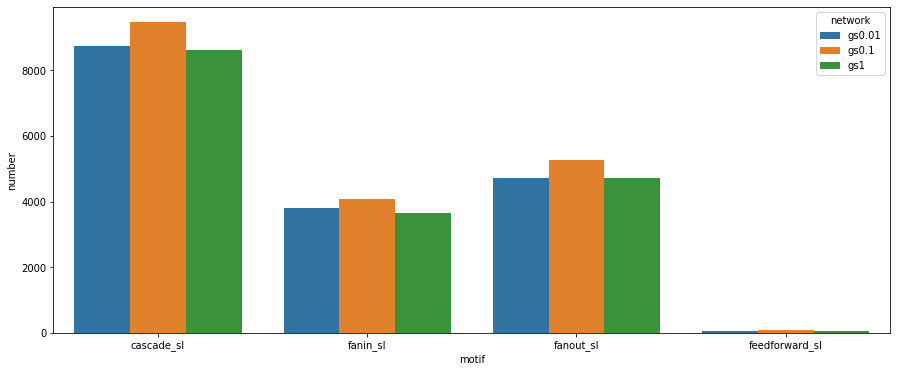

In [6]:
plt.figure(figsize=(15, 6))
sns.barplot(data=gs_results, x="motif", y="number", hue="network");